**generate fake data**

In [4]:
from faker import Factory
fake = Factory.create()

In [5]:
def is_hospitalized(duration):
    # estimated threshold for hospitalizing a patients
    threshold = 43200 # seconds = 12 hours
    
    if duration.total_seconds() >= threshold:
        return '1'
    else:
        return '0'
        
def patient_log():
    name = fake.name()
    dob = fake.year()
    age = 2015 - int(dob)
    checkin = fake.date_time_this_month()
    checkout = fake.date_time_between(checkin, 'now')
    stay = checkout - checkin
    stay_hours = stay.total_seconds() / 60 / 60
    hospitalized = is_hospitalized(stay)
    return [name, age, str(checkin), str(checkout), 0, stay.days, "{0:.1f}".format(stay_hours), hospitalized]
# patient_log()

In [6]:
# write patients data to csv
NUM_PATIENTS = 1000

import csv
with open('patients-data.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['name', 'age', 'check-in', 'check-out', 'response-time', 'stay-days', 'stay-hours', 'hospitalized?'])
    for i in range(NUM_PATIENTS):
        spamwriter.writerow(patient_log())


In [7]:
# validate data consistency
import pandas as pd
data = pd.read_csv('patients-data.csv')
data[:3]

,name,age,check-in,check-out,response-time,stay-days,stay-hours,hospitalized?
0,Squire Bernier,16,2015-04-12 06:43:02,2015-04-13 00:40:00,0,0,17.9,1
1,Kassidy Nader,45,2015-04-02 00:41:28,2015-04-12 05:07:34,0,10,244.4,1
2,Pedro Littel,10,2015-04-10 06:22:17,2015-04-11 05:45:23,0,0,23.4,1


### plotting


In [19]:
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


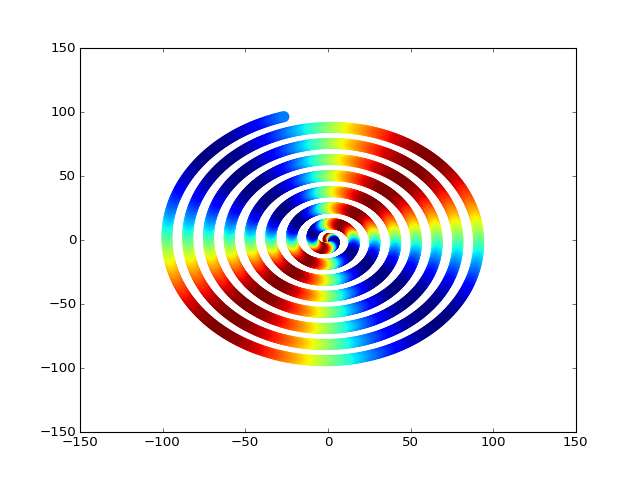

In [20]:
period = 0.5
f = np.arange(0, 100, 0.03) # Data range
z = np.sin(f)               # Data

a = f*np.sin(period*f);
b = f*np.cos(period*f);

fig = plt.figure()
ax = plt.subplot(111)
fig.add_subplot(ax)
ax.scatter(a, b, c=z, s=100, edgecolors='none')

plt.show()

matplotlib problem:
> http://www.cybertechquestions.com/matplotlib-issue-on-os-x-importerror-cannot-import-name-thread_1233662.html
solved: replace six.py from python 2.7 with six.py in python 3.4

## Experimentation lab

In [12]:
# generate service time interval, check-in check-out
checkin = fake.date_time_this_month()
checkout =fake.date_time_between(checkin, 'now')
duration = checkout - checkin
stay_hours = duration.seconds / 60 / 60

print checkin
print checkout
print duration.days, "{0:.2f}".format(stay_hours)#, duration


2015-04-09 06:28:19
2015-04-13 06:15:25
3 23.00


<hr>

### Reference

faker 
http://www.joke2k.net/faker/

time series analysis http://nbviewer.ipython.org/github/changhiskhan/talks/blob/master/pydata2012/pandas_timeseries.ipynb

time series analysis with statsmodel 
http://conference.scipy.org/scipy2011/slides/mckinney_time_series.pdf